In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data=pd.read_csv("/content/play_tennis.csv")
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
number = LabelEncoder()
data['outlook'] = number.fit_transform(data['outlook'])
data['temp'] = number.fit_transform(data['temp'])
data['humidity'] = number.fit_transform(data['humidity'])
data['wind'] = number.fit_transform(data['wind'])
data['play']=number.fit_transform(data['play'])
data

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [11]:
x = data[["outlook", "temp", "humidity", "wind"]]
y = data["play"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.33,random_state = 54)

In [14]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [15]:
pred = model.predict(x_test)
pred

array([1, 1, 1, 1, 1])

In [16]:
df = pd.DataFrame({'Actual value': y_test, 'predicted value': pred})
df

,Actual value,predicted value
4,1,1
12,1,1
9,1,1
3,1,1
13,0,1


In [18]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
confusion = confusion_matrix(y_test, pred)
print(confusion)

[[0 1]
 [0 4]]


Text(0.5, 23.52222222222222, 'Predicted')

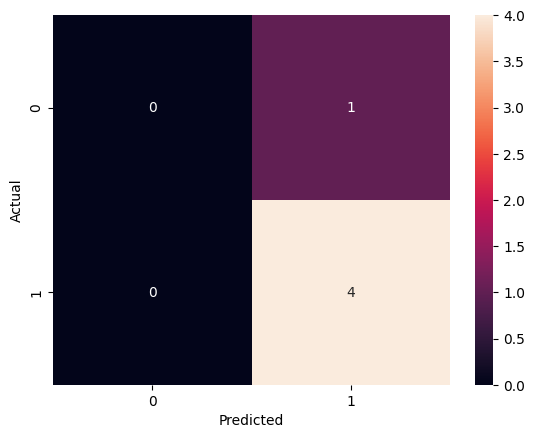

In [27]:
sns.heatmap(confusion, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [28]:
pred = model.predict_proba(x_test)
pred

array([[1.37124777e-01, 8.62875223e-01],
       [4.02044587e-04, 9.99597955e-01],
       [1.37124777e-01, 8.62875223e-01],
       [4.77670162e-01, 5.22329838e-01],
       [3.76121016e-01, 6.23878984e-01]])

In [29]:
print(model.predict([[1,2,0,1]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
